Random Forest with CIFAR-10

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




In [2]:
cifar = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
train_images = train_images.reshape(train_images.shape[0],32*32*3)
test_images = test_images.reshape(test_images.shape[0],32*32*3)

In [5]:
# It seems random forest is much faster than MLP and more accurate
model = RandomForestClassifier(n_estimators=128, criterion='entropy', max_depth=20, n_jobs=-1, oob_score=True) 
# model = MLPClassifier(max_iter=700) # 0.8557, 190 seconds
model.fit(train_images, train_labels.ravel())

# Predict
y_pred = model.predict(test_images)

# Print result
print(accuracy_score(test_labels, y_pred))

0.4715


0.4715
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.53      0.54      0.53      1000
           2       0.39      0.31      0.34      1000
           3       0.35      0.26      0.30      1000
           4       0.41      0.42      0.41      1000
           5       0.42      0.40      0.41      1000
           6       0.45      0.57      0.50      1000
           7       0.51      0.45      0.48      1000
           8       0.57      0.64      0.60      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



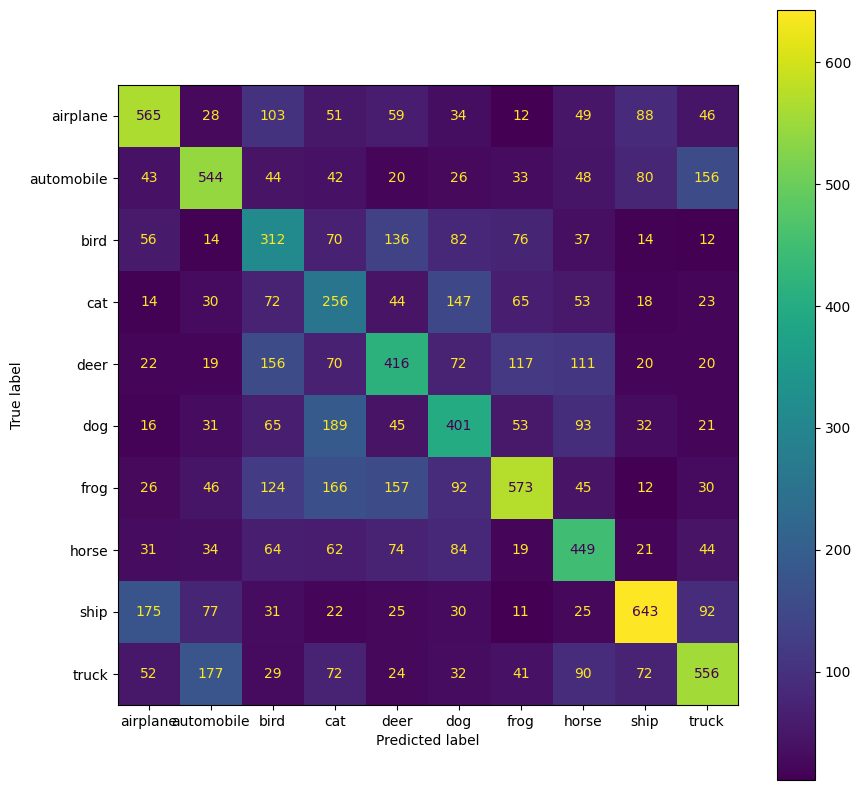

In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(y_pred,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [8]:
oob_error = 1 - model.oob_score_
model.oob_score_

0.43704